# Project: Wrangling and Analyze Data

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Gathering](#DataGathering)
3. [Assessing Data](#AssessingData)
  - [Quality Issues](#QualityIssues)
  - [Tidiness Issues](#TidinessIssues)
4. [Cleaning Data](#CleaningData)
  - [Issue #1](#Issue1)
  - [Issue #2](#Issue2)
  - [Issue #3](#Issue3)
  - [Issue #4](#Issue4)
  - [Issue #5](#Issue5)
  - [Issue #6](#Issue6)
  - [Issue #7](#Issue7)
  - [Issue #8](#Issue8)
  - [Issue #9](#Issue9)
  - [Issue #10](#Issue10)
  - [Issue #11](#Issue11)
  - [Issue #12](#Issue12)
  - [Reassessing Data](#ReassessingData)
  - [Issue #13](#Issue13)
6. [Storing Data](#StoringData)
7. [Analyzing and Visualizing Data](#AnalyzingVisualizing)
  - [Feature Engineering](#FeatureEngineering)
  - [Analysis](#Analysis)
    - [Research Question 1](#Question1)
    - [Research Question 2](#Question2)
    - [Research Question 3](#Question3)
    - [Research Question 4](#Question4)
    - [Research Question 5](#Question5)
    - [Research Question 6](#Question6)
  - [Insights](#Insights)

## Introduction <a id="Introduction"></a>
The aim of this project is to investigate trends in the response to tweets by the WeRateDogs Twitter account, as measured by the number of retweets and favourites the tweets receive. In this project, we will aqcuire data about the tweets from three different sources, assess the data for quality and tidiness, clean the data, analyze the data and produce visualizations, and derive insights thereof. In addition to this notebook, we will also provide two reports, one detailing the data wrangling process, and the other detailing the analysis and visualization tasks and our insights and conclusions.

## Data Gathering <a id="DataGathering"></a>
In this section, we will be gathering the three pieces of data that we need for this project. We will use a different method for each piece of data.

We import the libraries we will need throughout this project.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

We start with our first dataset. We already directly downloaded the `twitter-archive-enhanced.csv` file manually in a web browser, and have it stored locally. We now load it into a dataframe and view the first few rows.

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

We move on to our second dataset. We now use the *requests* library to download the `image_predictions.tsv` file from the provided link. We then load it into a dataframe and view the first few rows.

In [4]:
# Downloading the file from the given URL
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:
# Saving the file locally
with open(url.split("/")[-1], "wb") as file:
    file.write(response.content)

In [6]:
image_predictions = pd.read_csv("image-predictions.tsv", sep = "\t")

In [7]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

For our third dataset, we will query additional data using the Twitter API.

We start by loading our authentication details from a locally saved file.

In [8]:
# Importing Twitter API authentication keys and secrets
from my_twitter_keys import *

We now instantiate the objects we need to access the API and pull data.

In [9]:
# Instantiating authentication and Tweepy API objects using authentication keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

We will be pulling additional data for the tweets for which we already have some data. Thus, we first store the tweet IDs for the tweets we already have in a new list. We will use these to identify the tweets for which we need data from the API.

In [10]:
# Extracting tweet IDs from first dataframe
tweet_ids = twitter_archive["tweet_id"].values
len(tweet_ids)

2356

We have a total of 2356 tweet IDs.

We create a counter variable to use in the loop that will iterate through the tweets. We also set up an empty dictionary that will hold the tweet IDs for tweets whose data are not succesfully acquired from the API.

In [11]:
# Creating variables for use when pulling data from the Twitter API
count = 0
fails_dict = {}

We iterate through the tweet IDs, querying the API for each one in turn. We use *print* statements to track our progress through the iterations. We also document the start time and end time of this operation. In each iteration, we save the retrieved tweet to a local file, *tweet_json.txt*, storing the JSON object for each tweet on a new line in the file.

In [33]:
# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Fail
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513


In [34]:
# Length of time to query data from Twitter API, in seconds
print(end - start)

10423.42182036077


The difference between the start and end time shows that querying all our data took just under 3 hours. Below we print out the dictionary of the unsuccessful queries and the error messages thereof, as well as the length of this dictionary.

In [35]:
# The tweet IDs for which the query was unsuccessful
print(fails_dict)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 886366144734445568: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=886366144734445568&tweet_mode=extended (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x000000000A6286A0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))",), 885528943205470208: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)",), 879674319642796034: TweepError('Failed to send request: EOF occurred in violation of protocol (_ssl.c:852)',), 873697596434513921: TweepError([{'code': 144, 'message': 'No status

In [36]:
len(fails_dict)

126

We see that only 126 queries were unsuccessful. We should have 2230 successfully retreved tweets.

We now read our saved *tweet_json.txt* file, line by line, to a list of dictionaries, one per tweet, in preparation for loading the data into a dataframe.

In [12]:
# List to hold dictionaries
json_list = []
# Reading txt file line by line, extracting required fields, and storing to list
with open("tweet_json.txt") as json_file:
    for line in json_file:
        current_tweet = json.loads(line)
        current_dict = {
            "tweet_id": current_tweet["id"],
            "retweet_count": current_tweet["retweet_count"],
            "favorite_count": current_tweet["favorite_count"]
        }
        json_list.append(current_dict)

In [13]:
len(json_list)

2230

The length of the list is 2230 as we expected. We now load the data into a dataframe, and view the first few rows.

In [14]:
tweet_json_df = pd.DataFrame(json_list)

In [15]:
tweet_json_df.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           6969           33697
1  892177421306343426           5272           29223
2  891815181378084864           3464           21978
3  891689557279858688           7191           36790
4  891327558926688256           7717           35182

## Assessing Data <a id="AssessingData"></a>

In this section, we will be assessing our data for quality and tidiness. We will use both visual and programmatic assessment.

We first check the current setting for the maximum number of columns displayed when we view a dataframe.

In [16]:
pd.get_option("display.max_columns")

20

As some of our dataframes from this point onward may have more than 20 columns, for the purposes of visual inspection of our data, we will temporarily remove the limit so that we can view all columns without truncation.

In [17]:
pd.set_option("display.max_columns", None)

We now begin visual inspection of all 3 of our dataframes. We will document our observations below the displayed dataframes.

In [18]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [19]:
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [20]:
tweet_json_df

tweet_id  retweet_count  favorite_count
0     892420643555336193           6969           33697
1     892177421306343426           5272           29223
2     891815181378084864           3464           21978
3     891689557279858688           7191           36790
4     891327558926688256           7717           35182
...                  ...            ...             ...
2225  666049248165822465             36              88
2226  666044226329800704            115             246
2227  666033412701032449             36             100
2228  666029285002620928             39             112
2229  666020888022790149            419            2283

[2230 rows x 3 columns]

We additionally also viewed and explored the original files in JupyterLab tabs, for thoroughness and completeness.

We now begin programmatic assessment of our dataframes. Our observations continue to be documented below the assessment function calls.

We start by looking at the structure of each of our dataframes.

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2230 non-null   int64
 1   retweet_count   2230 non-null   int64
 2   favorite_count  2230 non-null   int64
dtypes: int64(3)
memory usage: 52.4 KB


We now look at the descriptive statistics for each dataframe.

In [24]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [25]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [26]:
tweet_json_df.describe()

tweet_id  retweet_count  favorite_count
count  2.230000e+03    2230.000000     2230.000000
mean   7.417830e+17    2480.540807     7089.805381
std    6.848578e+16    4209.416015    11044.586681
min    6.660209e+17       1.000000        0.000000
25%    6.782926e+17     494.250000     1228.000000
50%    7.167608e+17    1145.500000     3023.500000
75%    7.986833e+17    2878.750000     8736.500000
max    8.924206e+17   70334.000000   144247.000000

Finally, we view a random sample of 8 rows from each dataframe.

In [27]:
twitter_archive.sample(8)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
740   780543529827336192                    NaN                  NaN   
1038  744334592493166593                    NaN                  NaN   
1682  681891461017812993                    NaN                  NaN   
1030  745433870967832576                    NaN                  NaN   
746   780074436359819264                    NaN                  NaN   
2135  670061506722140161                    NaN                  NaN   
845   766423258543644672                    NaN                  NaN   
1382  700864154249383937                    NaN                  NaN   

                      timestamp  \
740   2016-09-26 23:04:13 +0000   
1038  2016-06-19 01:02:50 +0000   
1682  2015-12-29 17:36:07 +0000   
1030  2016-06-22 01:50:58 +0000   
746   2016-09-25 16:00:13 +0000   
2135  2015-11-27 02:08:07 +0000   
845   2016-08-18 23:55:18 +0000   
1382  2016-02-20 02:06:50 +0000   

                                                 source  \
740   <a href="http://twitter.com/download/iphone" r...   
1038  <a href="http://twitter.com/download/iphone" r...   
1682  <a href="http://twitter.com/download/iphone" r...   
1030  <a href="http://twitter.com/download/iphone" r...   
746   <a href="http://vine.co" rel="nofollow">Vine -...   
2135  <a href="http://twitter.com/download/iphone" r...   
845   <a href="http://twitter.com/download/iphone" r...   
1382  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
740   Here's a perturbed super floof. 12/10 would sn...                  NaN   
1038  This is Blanket. She has overthrown her human....                  NaN   
1682  Say hello to Charlie. He's scholarly af. Quite...                  NaN   
1030  This is Lenox. She's in a wheelbarrow. Silly d...                  NaN   
746   Here's a doggo questioning his entire existenc...                  NaN   
2135  This is Liam. He has a particular set of skill...                  NaN   
845   This is Shadoe. Her tongue flies out of her mo...                  NaN   
1382  "Pupper is a present to world. Here is a bow f...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
740                        NaN                        NaN   
1038                       NaN                        NaN   
1682                       NaN                        NaN   
1030                       NaN                        NaN   
746                        NaN                        NaN   
2135                       NaN                        NaN   
845                        NaN                        NaN   
1382                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
740   https://twitter.com/dog_rates/status/780543529...                12   
1038  https://twitter.com/dog_rates/status/744334592...                11   
1682  https://twitter.com/dog_rates/status/681891461...                10   
1030  https://twitter.com/dog_rates/status/745433870...                10   
746                       https://vine.co/v/5nzYBpl0TY2                10   
2135  https://twitter.com/dog_rates/status/670061506...                11   
845   https://twitter.com/dog_rates/status/766423258...                 9   
1382  https://twitter.com/dog_rates/status/700864154...                12   

      rating_denominator     name  doggo floofer  pupper puppo  
740                   10     None   None    None    None  None  
1038                  10  Blanket   None    None    None  None  
1682                  10  Charlie   None    None  pupper  None  
1030                  10    Lenox  doggo    None    None  None  
746                   10     None  doggo    None    None  None  
2135                  10     Liam   None    None    None  None  
845                   10   Shadoe   None    None    None  None  
1382                  10        a 

In [28]:
image_predictions.sample(8)

tweet_id                                          jpg_url  \
1556  793210959003287553  https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg   
1088  718971898235854848  https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg   
536   676946864479084545  https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg   
1460  778039087836069888  https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg   
2036  884441805382717440  https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg   
205   669923323644657664  https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg   
780   689977555533848577  https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg   
1431  773247561583001600  https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
1556        1           doormat  0.874431   False      French_bulldog   
1088        1  golden_retriever  0.140394    True       Saint_Bernard   
536         1          Pekinese  0.752707    True    golden_retriever   
1460        2   German_shepherd  0.717776    True            malinois   
2036        1          Pembroke  0.993225    True            Cardigan   
205         1        car_mirror  0.343063   False           seat_belt   
780         1        cowboy_hat  0.291081   False  Labrador_retriever   
1431        1         seat_belt  0.713588   False  miniature_pinscher   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
1556  0.018759    True         Boston_bull  0.015134    True  
1088  0.118769    True  Labrador_retriever  0.075492    True  
536   0.055655    True      Great_Pyrenees  0.041018    True  
1460  0.111175    True  Norwegian_elkhound  0.058802    True  
2036  0.003216    True           Chihuahua  0.002081    True  
205   0.110289   False                wing  0.080148   False  
780   0.179625    True            sombrero  0.121493   False  
1431  0.083369    True   Brabancon_griffon  0.075696    True

In [29]:
tweet_json_df.sample(8)

tweet_id  retweet_count  favorite_count
863   754120377874386944           2153            7364
1659  678740035362037760           1484            3388
1227  706538006853918722           1286            3184
658   786036967502913536           6479               0
112   869702957897576449           5363           24967
2011  670338931251150849             96             373
2195  666447344410484738             19              90
990   740995100998766593           2458            5806

### Quality Issues <a id="QualityIssues"></a>
#### `twitter_archive` dataframe
1. The data types are incorrect for the following columns: *tweet_id*, *in_reply_to_status_id* and *in_reply_to_user_id* show numerical data types, *timestamp* shows a string data type, *retweeted_status_id* and *retweeted_status_user_id* show numerical data types, and *retweeted_status_timestamp* shows a string data type.

2. Some of the values in the *rating_denominator* column are not 10.

3. Some of the values in the *name* column are not names, for example "a", "very" or "the".

4. The *retweeted_status_id* column has some non-null values, indicating the presence of retweets in the data.

5. The *in_reply_to_status_id* column has some non-null values, indicating the presence of replies that are not original tweets in the data.

6. The *expanded_urls* column has some null values, indicating the presence of tweets that do not have images.

7. The *expanded_urls* column has some links that point to videos, rather than images.

8. Ampersands (&) in the *text* column have the spurious string "amp;" after them, which is not part of the original tweet.

#### `image_predictions` dataframe
9. The data type is incorrect for the *tweet_id* column. It shows an int data type.

#### `tweet_json_df` dataframe
10. The data type is incorrect for the *tweet_id* column. It shows an int data type.

### Tidiness Issues <a id="TidinessIssues"></a>
1. In the `twitter_archive` dataframe, the column headers *doggo*, *floofer*, *pupper* and *puppo* are values of the dog stage variable, but each have their own column in the dataframe.

2. There is only one type of observational unit, the tweet, but the data is distributed across the three dataframes, `twitter_archive`, `image_predictions`, and `tweet_json_df`.

We have identified a total of 12 issues in our data that need to be addressed. We will do so in the next section.

## Cleaning Data <a id="CleaningData"></a>
In the previous section, we identified 12 issues for which data cleaning is necessary. In this section, we will go about the cleaning steps. We will not necessarily address the issues in the order presented above. We will tackle the issues in a more intuitive order, maximizing efficiency.

First, we will make copies of our data before we start the cleaning process.

In [30]:
# Making copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_df_clean = tweet_json_df.copy()

### Issue #1: One variable in four columns in `twitter_archive` dataframe (*doggo*, *floofer*, *pupper* and *puppo*) <a id="Issue1"></a>

One of the requirements for tidiness is that each variable form a column. This issues needs to be addressed to satisfy that requirement.

#### Define
- Create dog stage variable, and add appropriate *doggo*, *floofer*, *pupper* and *puppo* values for each tweet
- Delete *doggo*, *floofer*, *pupper* and *puppo* columns from dataframe

#### Code
We create a Pandas series for each current dog stage column, holding boolean values for each row. The boolean value indicates whether the dog stage in question is mentioned in the text of the tweet in that particular row. We convert the boolean values to int values, for easier manipulation in the next step.

In [31]:
# Series to hold values indicating presence of mentions of each dog stage for each tweet
# Boolean values are typecast to integers
is_doggo = (twitter_archive_clean["doggo"] != "None").astype(int)
is_floofer = (twitter_archive_clean["floofer"] != "None").astype(int)
is_pupper = (twitter_archive_clean["pupper"] != "None").astype(int)
is_puppo = (twitter_archive_clean["puppo"] != "None").astype(int)

We now add the four Pandas series together. This will help us determine whether there are tweets in which more than one dog stage is mentioned. We view the counts of the number of tweets for each number of dog stages mentioned.

In [32]:
# Adding values to show count of dog stages for each tweet
sum_stages = is_doggo + is_floofer + is_pupper + is_puppo
sum_stages.value_counts()

0    1976
1     366
2      14
dtype: int64

We see that there are 1976 tweets that do not mention a dog stage, 366 that mention only one dog stage, and 14 tweets that mention two dog stages. No tweets mention three dog stages or four dog stages in the same tweet. Since there are only 14 rows where two dog stages are mentioned, we will do a visual inspection of the dog stage columns for those rows.

In [33]:
# Extracting rows which have more than 1 dog stage
twitter_archive_clean[sum_stages > 1][["tweet_id", "doggo", "floofer", "pupper", "puppo"]]

tweet_id  doggo  floofer  pupper  puppo
191   855851453814013952  doggo     None    None  puppo
200   854010172552949760  doggo  floofer    None   None
460   817777686764523521  doggo     None  pupper   None
531   808106460588765185  doggo     None  pupper   None
565   802265048156610565  doggo     None  pupper   None
575   801115127852503040  doggo     None  pupper   None
705   785639753186217984  doggo     None  pupper   None
733   781308096455073793  doggo     None  pupper   None
778   775898661951791106  doggo     None  pupper   None
822   770093767776997377  doggo     None  pupper   None
889   759793422261743616  doggo     None  pupper   None
956   751583847268179968  doggo     None  pupper   None
1063  741067306818797568  doggo     None  pupper   None
1113  733109485275860992  doggo     None  pupper   None

We see that all 14 tweets mention "doggo" and one other dog stage. One mentions "doggo" and "puppo", another mentions "doggo" and "floofer", and the other 12 mention "doggo" and "pupper".

We will create a new list combining the values of all dog stage columns. For each tweet, we create a string that is a concatenation of all the dog stages mentioned in the tweet, sepaated by a comma. So for the tweet that mentions both "doggo" and "puppo", the resulting string will be "doggo,puppo". For tweets that do not mention any of the four dog stages, the vale will remain "None". A `for` loop iterates through this process, and populates the empty list with the resulting strings.

In [34]:
# Empty list, to hold string of dog stages for each tweet
dog_stage_list = []
# Loop iterating through first dataframe, concatenating all dog stages mentioned in each tweet
for i in np.arange(len(twitter_archive_clean)):
    # Initialzing empty string at start of loop
    dog_stage_string = ""
    
    # Checking whether "doggo" is mentioned, adding it to string if it is
    if twitter_archive_clean["doggo"][i] != "None":
        dog_stage_string = dog_stage_string + twitter_archive_clean["doggo"][i]
    
    # Checking whether "floofer" is mentioned, adding it to string if it is
    if twitter_archive_clean["floofer"][i] != "None":
        if dog_stage_string == "":
            dog_stage_string = dog_stage_string + twitter_archive_clean["floofer"][i]
        else:
            dog_stage_string = dog_stage_string + "," + twitter_archive_clean["floofer"][i]
    
    # Checking whether "pupper" is mentioned, adding it to string if it is
    if twitter_archive_clean["pupper"][i] != "None":
        if dog_stage_string == "":
            dog_stage_string = dog_stage_string + twitter_archive_clean["pupper"][i]
        else:
            dog_stage_string = dog_stage_string + "," + twitter_archive_clean["pupper"][i]
    
    # Checking whether "puppo" is mentioned, adding it to string if it is
    if twitter_archive_clean["puppo"][i] != "None":
        if dog_stage_string == "":
            dog_stage_string = dog_stage_string + twitter_archive_clean["puppo"][i]
        else:
            dog_stage_string = dog_stage_string + "," + twitter_archive_clean["puppo"][i]
    
    # For tweets for which no stage is mentioned, setting string to "None"
    if dog_stage_string == "":
        dog_stage_string = "None"
    
    # Adding resulting string for current tweet to list
    dog_stage_list.append(dog_stage_string)

We check the counts of the value in our list to ensure it populated correctly.

In [35]:
# Counts of dog stage list
pd.Series(dog_stage_list).value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
dtype: int64

A total of 14 values show two dog stages, as expected. The number of values recorded as "None" is also correct. We now create a new column in our dataframe, *dog_stage*, and populate it with the values in our list of dog stages.

In [36]:
# Adding list as new column to dataframe
twitter_archive_clean["dog_stage"] = dog_stage_list

We drop the original 4 columns that held the dog stages separately.

In [37]:
# Dropping columns for tidiness
twitter_archive_clean.drop(columns = ["doggo", "floofer", "pupper", "puppo"], inplace = True)

#### Test
We check that the four dropped columns are no longer in the dataframe, and that our new *dog_stage* column is in the dataframe. We make use of `assert` statements for this.

In [38]:
assert "doggo" not in twitter_archive_clean.columns
assert "floofer" not in twitter_archive_clean.columns
assert "pupper" not in twitter_archive_clean.columns
assert "puppo" not in twitter_archive_clean.columns
assert "dog_stage" in twitter_archive_clean.columns

The code cell runs without errors. We check a sample of the values in the new column.

In [45]:
twitter_archive_clean["dog_stage"].sample(20)

797             None
2244            None
1561            None
342             None
2057            None
1471            None
472             None
665             None
565     doggo,pupper
774          floofer
1551          pupper
86              None
2162            None
865             None
1853            None
630             None
239             None
835            doggo
1545            None
1907          pupper
Name: dog_stage, dtype: object

### Issue #2: Data for a single observational unit, a tweet, is distributed across three dataframes <a id="Issue2"></a>

We will address this tidiness issue prior to addressing the rest of the quality issues. By addressing this issue first, we remove the need to clean each dataframe separately, redundantly repeating the same cleaning steps for each dataframe. Instead, after addressing this tidiness issue, we will be focusing the rest of our cleaning efforts towards one dataframe, which is significantly more efficient.

#### Define
- Confirm that the only column in common across the dataframes is the *tweet_id* column.
- Merge the three dataframes, `twitter_archive`, `image_predictions`, and `tweet_json_df`, on the common *tweet_id* column.

#### Code
We want to combine the data in our multiple datframes in a single dataframe.

To check the columns that are duplicated across the three dataframes, we combine the column names of all dataframes in a Pandas series, and then display the columns that appear more than once.

In [39]:
# Confirm that the only column in common across the dataframes is the tweet_id column
all_columns = pd.Series(list(twitter_archive_clean) + list(image_predictions_clean) + list(tweet_json_df_clean))
all_columns.value_counts()[all_columns.value_counts() != 1]

tweet_id    3
dtype: int64

Only the *tweet_id* column is duplicated, and it appears in all three dataframes. We now look at the number of rows in each dataframe.

In [40]:
len(twitter_archive_clean)

2356

In [41]:
len(image_predictions_clean)

2075

In [42]:
len(tweet_json_df_clean)

2230

The difference in the lengths of the dataframes indicates that there are some entries that appear in only some, not all, of the dataframes. We want to retain data for the tweets for which we have both image prediction data, and retweet and favourite count data. Therefore, we will use an inner join to merge the first dataframe with the second, and then merge that result with the third dataframe using an inner join once more. Thus, we retain only the tweets whose tweet ID appears in all three dataframes.

In [43]:
# Merge the three dataframes, twitter_archive, image_predictions, and tweet_json_df, on the common tweet_id column.
merged_archive = twitter_archive_clean.merge(image_predictions_clean, how = "inner", on = "tweet_id").merge(tweet_json_df_clean, how = "inner", on = "tweet_id")

#### Test
We look at the structure of the new dataframe, to confirma that all columns are present.

In [44]:
merged_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1969 non-null   int64  
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   1969 non-null   object 
 4   source                      1969 non-null   object 
 5   text                        1969 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               1969 non-null   object 
 10  rating_numerator            1969 non-null   int64  
 11  rating_denominator          1969 non-null   int64  
 12  name                        1969 non-null   object 
 13  dog_stage                   1969 

All columns are present. We also observe that a total of 1969 records met the requirements of our merge. We now look at a random sample of 5 rows from the dataframe.

In [45]:
merged_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1615  672988786805112832                    NaN                  NaN   
489   793226087023144960                    NaN                  NaN   
880   728035342121635841                    NaN                  NaN   
840   737310737551491075                    NaN                  NaN   
740   750147208377409536                    NaN                  NaN   

                      timestamp  \
1615  2015-12-05 04:00:04 +0000   
489   2016-10-31 23:00:11 +0000   
880   2016-05-05 01:35:26 +0000   
840   2016-05-30 15:52:33 +0000   
740   2016-07-05 02:00:06 +0000   

                                                 source  \
1615  <a href="http://twitter.com/download/iphone" r...   
489   <a href="http://twitter.com/download/iphone" r...   
880   <a href="http://twitter.com/download/iphone" r...   
840   <a href="http://twitter.com/download/iphone" r...   
740   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1615  This is Schnozz. He's had a blurred tail since...                  NaN   
489   This is Juno. She spooked me up real good, but...                  NaN   
880   This is all I want in my life. 12/10 for super...                  NaN   
840   Everybody stop what you're doing and watch the...                  NaN   
740   And finally, happy 4th of July from the squad ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1615                       NaN                        NaN   
489                        NaN                        NaN   
880                        NaN                        NaN   
840                        NaN                        NaN   
740                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1615  https://twitter.com/dog_rates/status/672988786...                10   
489   https://twitter.com/dog_rates/status/793226087...                11   
880   https://twitter.com/dog_rates/status/728035342...                12   
840   https://twitter.com/dog_rates/status/737310737...                13   
740   https://twitter.com/dog_rates/status/750147208...                13   

      rating_denominator     name dog_stage  \
1615                  10  Schnozz    pupper   
489                   10     Juno      None   
880                   10      all    pupper   
840                   10     None      None   
740                   10     None      None   

                                                jpg_url  img_num  \
1615    https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg        1   
489     https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg        1   
880     https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg        1   
840   https://pbs.twimg.com/ext_tw_video_thumb/73731...        1   
740     https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg        1   

                           p1   p1_conf  p1_dog                           p2  \
1615         Lakeland_terrier  0.836632    True  West_Highland_white_terrier   
489   wire-haired_fox_terrier  0.456047    True             Lakeland_terrier   
880              handkerchief  0.302961   False                   Pomeranian   
840                     cliff  0.439077   False                     lakeside   
740                       pug  0.977765    True                  Boston_bull   

       p2_conf  p2_dog                       p3   p3_conf  p3_dog  \
1615  0.073900    True  wire-haired_fox_terrier  0.038160    True   
489   0.273428    True         English_springer  0.083643    True   
880   0.248664    True                 Shih-Tzu  0.111015    True   
840   0.062899   False                   valley  0.039759   False   
740   0.004794    True           French_bulldog  0.004573    True   

      retweet_count  favorite_count  
1615            253             873  
489            2704            9253  
880 

This is satisfactory. We move on to the next issue.

### Issue #3: Incorrect data types in `twitter_archive` dataframe for *tweet_id*, *in_reply_to_status_id*, *in_reply_to_user_id*, *timestamp*, *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp* columns <a id="Issue3"></a>

#### Define:
- Convert data types for *tweet_id*, *in_reply_to_status_id* and *in_reply_to_user_id* to *string* from *int* and *float*.
- Convert data type for *timestamp* to *datetime* from *string*.
- Convert data types for *retweeted_status_id* and *retweeted_status_user_id* to *string* from *float*.
- Convert data type for *retweeted_status_timestamp* to *datetime* from *string*.

#### Code
We correct the data types for columns that require the correction.

In [46]:
# Convert data types for tweet_id, in_reply_to_status_id and in_reply_to_user_id to string from int and float.
merged_archive["tweet_id"] = merged_archive["tweet_id"].astype("string")
merged_archive["in_reply_to_status_id"] = merged_archive["in_reply_to_status_id"].astype("string")
merged_archive["in_reply_to_user_id"] = merged_archive["in_reply_to_user_id"].astype("string")

In [47]:
# Convert data type for timestamp to datetime from string.
merged_archive["timestamp"] = pd.to_datetime(merged_archive["timestamp"])

In [48]:
# Convert data types for retweeted_status_id and retweeted_status_user_id to string from float.
merged_archive["retweeted_status_id"] = merged_archive["retweeted_status_id"].astype("string")
merged_archive["retweeted_status_user_id"] = merged_archive["retweeted_status_user_id"].astype("string")

In [49]:
# Convert data type for retweeted_status_timestamp to datetime from string.
merged_archive["retweeted_status_timestamp"] = pd.to_datetime(merged_archive["retweeted_status_timestamp"])

#### Test

We look at the structure of the dataframe to confirm that the data types for all columns are now as we require.

In [50]:
merged_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1969 non-null   string             
 1   in_reply_to_status_id       22 non-null     string             
 2   in_reply_to_user_id         22 non-null     string             
 3   timestamp                   1969 non-null   datetime64[ns, UTC]
 4   source                      1969 non-null   object             
 5   text                        1969 non-null   object             
 6   retweeted_status_id         70 non-null     string             
 7   retweeted_status_user_id    70 non-null     string             
 8   retweeted_status_timestamp  70 non-null     datetime64[ns, UTC]
 9   expanded_urls               1969 non-null   object             
 10  rating_numerator            1969 non-null   int64           

The operation was successful. We move on to the next issue.

### Issue #4: Incorrect data types in `image_predictions` dataframe for *tweet_id* column <a id="Issue4"></a>

#### Define
- Convert data type for *tweet_id* to *string* from *int*.

#### Code

Since the original *image_predictions* dataframe has been absorbed into the *merged_archive* dataframe, and the data type has been corrected in *merged_archive*, this issue has effectively already been solved.

#### Test

In [51]:
merged_archive["tweet_id"].dtype

StringDtype

### Issue #5: Incorrect data types in `tweet_json_df` dataframe for *tweet_id* column <a id="Issue5"></a>

#### Define
- Convert data type for *tweet_id* to *string* from *int*.

#### Code

Since the original *tweet_json_df* dataframe has been absorbed into the *merged_archive* dataframe, and the data type has been corrected in *merged_archive*, this issue has effectively already been solved.

#### Test

In [52]:
merged_archive["tweet_id"].dtype

StringDtype

### Issue #6: The *retweeted_status_id* column has some non-null values, indicating the presence of retweets in the data. <a id="Issue6"></a>

#### Define
- Identify rows where the *retweeted_status_id* column has values.
- Drop the identified rows from the dataframe.
- Confirm that the rows have been dropped, and that the *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp* columns have null values only.
- Drop *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp* columns from dataframe.

#### Code
We would like to retain only the tweets that are not retweets in our datframe. Retweets are indicated by non-null values in, among others, the *retweeted_status_id* column.

We first identify the rows for which there are values in this column using a mask, and then use the index values of those values to drop them from the dataframe.

In [53]:
# Identify rows where the retweeted_status_id column has values.
retweet_mask = merged_archive["retweeted_status_id"].notnull()
# Drop the identified rows from the dataframe.
merged_archive.drop(merged_archive[retweet_mask].index, axis = "index", inplace = True)

We reset the index values of the remaining records.

In [54]:
merged_archive.reset_index(drop = True, inplace = True)

We check that the values for all the columns that hold data for retweeted tweets only now have null values only.

In [55]:
# Confirm that the rows have been dropped, and that the retweeted_status_id,
# retweeted_status_user_id, and retweeted_status_timestamp columns have null values only.
merged_archive[["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   retweeted_status_id         0 non-null      string             
 1   retweeted_status_user_id    0 non-null      string             
 2   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), string(2)
memory usage: 44.6 KB


This is the case. We now drop these columns from the dataframe, as they are now empty and we have no further use for them.

In [56]:
# Drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns from dataframe.
merged_archive.drop(columns = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace = True)

#### Test
We look at the structure of the dataframe.

In [57]:
merged_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1899 non-null   string             
 1   in_reply_to_status_id  22 non-null     string             
 2   in_reply_to_user_id    22 non-null     string             
 3   timestamp              1899 non-null   datetime64[ns, UTC]
 4   source                 1899 non-null   object             
 5   text                   1899 non-null   object             
 6   expanded_urls          1899 non-null   object             
 7   rating_numerator       1899 non-null   int64              
 8   rating_denominator     1899 non-null   int64              
 9   name                   1899 non-null   object             
 10  dog_stage              1899 non-null   object             
 11  jpg_url                1899 non-null   object           

The dropped columns are no longer present in the dataframe. We now have 1899 records in the dataframe.

### Issue #7: The *in_reply_to_status_id* column has some non-null values, indicating the presence of replies that are not original tweets in the data. <a id="Issue7"></a>

#### Define
- Identify rows where the *in_reply_to_status_id* column has values.
- Drop the identified rows from the dataframe.
- Confirm that the rows have been dropped, and that the *in_reply_to_status_id* and *in_reply_to_user_id* columns have null values only
- Drop *in_reply_to_status_id* and *in_reply_to_user_id* columns from dataframe.

#### Code
We want original tweets only, which means that those that are replies to other tweets need to be removed from the dataframe. Replies are indicated by non-null values in, among others, the *in_reply_to_status_id* column.

We first identify the rows for which there are values in this column using a mask, and then use the index values of those values to drop them from the dataframe.

In [58]:
# Identify rows where the in_reply_to_status_id column has values.
reply_mask = merged_archive["in_reply_to_status_id"].notnull()
# Drop the identified rows from the dataframe.
merged_archive.drop(merged_archive[reply_mask].index, axis = "index", inplace = True)

We reset the index values of the remaining records.

In [59]:
merged_archive.reset_index(drop = True, inplace = True)

We check that the values for all the columns that hold data for reply tweets only now have null values only.

In [60]:
# Confirm that the rows have been dropped, and that the in_reply_to_status_id
# and in_reply_to_user_id columns have null values only
merged_archive[["in_reply_to_status_id", "in_reply_to_user_id"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   in_reply_to_status_id  0 non-null      string
 1   in_reply_to_user_id    0 non-null      string
dtypes: string(2)
memory usage: 29.5 KB


This is the case. We now drop these columns from the dataframe, as they are now empty and we have no further use for them.

In [61]:
# Drop in_reply_to_status_id and in_reply_to_user_id columns from dataframe.
merged_archive.drop(columns = ["in_reply_to_status_id", "in_reply_to_user_id"], inplace = True)

#### Test
We look at the structure of the dataframe.

In [62]:
merged_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1877 non-null   string             
 1   timestamp           1877 non-null   datetime64[ns, UTC]
 2   source              1877 non-null   object             
 3   text                1877 non-null   object             
 4   expanded_urls       1877 non-null   object             
 5   rating_numerator    1877 non-null   int64              
 6   rating_denominator  1877 non-null   int64              
 7   name                1877 non-null   object             
 8   dog_stage           1877 non-null   object             
 9   jpg_url             1877 non-null   object             
 10  img_num             1877 non-null   int64              
 11  p1                  1877 non-null   object             
 12  p1_conf             1877 non-null 

The dropped columns are no longer present. We now have 1877 total records. We move on to the next issue.

### Issue #8: The *expanded_urls* column has some null values, indicating the presence of tweets that do not have images.<a id="Issue8"></a>

#### Define
- Identify rows where the *expanded_urls* column has null values.
- Drop the identified rows from the dataframe.

#### Code

From the above info for the `merged_archive` dataframe, we see that the *expanded_urls* column no longer has null values. The rows that contained these null values were not carried over when we merged the three disparate dataframes earlier. Therefore, this issue is effectively addressed.

#### Test

We double-check by checking for the total number of null values in the column.

In [63]:
merged_archive["expanded_urls"].isnull().sum()

0

This is the case. We move on to the next issue.

### Issue #9: The *expanded_urls* column has some links that point to videos, rather than images. <a id="Issue9"></a>

#### Define
- Identify rows for which the *expanded_urls* column does not contain at least one link to an image.
- Drop the identified rows from the dataframe.

#### Code
The *expanded_urls* contains the links to the media in a tweet. We want only those tweets that include at least one image. A tweet can have up to 4 images, therefore the number of links for each entry in this column is variable. We first look at a sample of the values in this column.

In [75]:
merged_archive["expanded_urls"].sample(5).values

array(['https://twitter.com/dog_rates/status/671488513339211776/photo/1',
       'https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1',
       'https://twitter.com/dog_rates/status/688894073864884227/photo/1',
       'https://twitter.com/dog_rates/status/800018252395122689/video/1',
       'https://twitter.com/dog_rates/status/768473857036525572/photo/1'],
      dtype=object)

We can see that the format of the URLs for tweets that have images is https<area>//twitter.<area>com/dog_rates/status/869702957897576449/photo/1, where the tweet ID is part of the link. We will use a regular expression matching this format to create a mask that identifies the rows that contain images and those that do not.

In [64]:
# Identify rows for which the expanded_urls column does not contain at least one link to an image.
image_urls_mask = merged_archive["expanded_urls"].str.contains("https://twitter\.com/dog_rates/status/[0-9]+/photo/[0-9]+", regex = True)

In [65]:
image_urls_mask.value_counts()

True     1808
False      69
Name: expanded_urls, dtype: int64

We see that we have 69 that do not have images. This is a low enough number that we can do quick a visual inspection of the entries to see what the links for those entries point to if not images.

In [66]:
# Inspect the identified rows in the dataframe.
merged_archive[~image_urls_mask]["expanded_urls"].values

array(['https://twitter.com/dog_rates/status/889278841981685760/video/1',
       'https://twitter.com/dog_rates/status/887517139158093824/video/1',
       'https://twitter.com/dog_rates/status/887343217045368832/video/1',
       'https://twitter.com/dog_rates/status/881536004380872706/video/1',
       'https://twitter.com/dog_rates/status/879415818425184262/video/1',
       'https://twitter.com/dog_rates/status/875144289856114688/video/1',
       'https://twitter.com/dog_rates/status/863553081350529029/video/1',
       'https://twitter.com/dog_rates/status/861288531465048066/video/1',
       'https://twitter.com/dog_rates/status/859196978902773760/video/1',
       'https://twitter.com/dog_rates/status/852226086759018497/video/1',
       'https://twitter.com/dog_rates/status/850380195714523136/video/1',
       'https://twitter.com/dog_rates/status/841314665196081154/video/1',
       'https://twitter.com/dog_rates/status/832273440279240704/video/1',
       'https://twitter.com/dog_rates/

We can see that for all 69 entries, the tweets contain a video and no images. We will drop all 69 rows from the dataframe, and then reset the index values of the remaining entries.

In [67]:
# Drop the identified rows from the dataframe.
merged_archive.drop(merged_archive[~image_urls_mask].index, axis = "index", inplace = True)

In [68]:
merged_archive.reset_index(drop = True, inplace = True)

#### Test
We again check the number of entries for tweets that have at least one image.

In [69]:
image_urls_mask = merged_archive["expanded_urls"].str.contains("https://twitter\.com/dog_rates/status/[0-9]+/photo/[0-9]+", regex = True)

In [70]:
image_urls_mask.value_counts()

True    1808
Name: expanded_urls, dtype: int64

We have no False values. We now have 1808 entries in our dataframe. We move on to the next issue.

### Issue #10: Some of the values in the *rating_denominator* column are not 10. <a id="Issue10"></a>

#### Define
- Identify rows for which *rating_denominator* is not 10.
- For each value, determine whether to modify the value or drop the row.

#### Code
We look at the counts for each unique value in the *rating_denominator* column.

In [71]:
merged_archive["rating_denominator"].value_counts()

10     1793
50        3
80        2
11        2
170       1
120       1
110       1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

There are 15 entries for which the rating is not out of 10. These are few enough for us to do a visual inspection. For each entry, we will look at the full text of the tweet as well as the extracted rating for the entry.

In [72]:
# Identify rows for which rating_denominator is not 10.
merged_archive[["tweet_id", "text", "rating_numerator", "rating_denominator"]][merged_archive["rating_denominator"] != 10]

tweet_id                                               text  \
291   820690176645140481  The floofs have been released I repeat the flo...   
347   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
703   740373189193256964  After so many requests, this is Bretagne. She ...   
742   731156023742988288  Say hello to this unbelievably well behaved sq...   
782   722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
815   716439118184652801  This is Bluebert. He just saw that both #Final...   
854   710658690886586372  Here's a brigade of puppers. All look very pre...   
872   709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
934   704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1005  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1162  684222868335505415  Someone help the girl is being mugged. Several...   
1185  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
1288  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1342  675853064436391936  Here we have an entire platoon of puppers. Tot...   
1789  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

      rating_numerator  rating_denominator  
291                 84                  70  
347                 24                   7  
703                  9                  11  
742                204                 170  
782                  4                  20  
815                 50                  50  
854                 80                  80  
872                 45                  50  
934                 60                  50  
1005                44                  40  
1162               121                 110  
1185                 7                  11  
1288               144                 120  
1342                88                  80  
1789                 1                   2

In [73]:
# For each value, determine whether to modify the value or drop the row.
merged_archive["text"][merged_archive["rating_denominator"] != 10].values

array(['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
       'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45

The initial extraction of the rating from the text when the dataset was first being compiled likely used a split on the "/" character and then obtained the numbers on either side of the character. This approach would cause issues for entries like the last one, where the first "/" is in the fraction 3 1/2, resulting in a recorded rating of 1/2, rather than the 9/10 actually in the tweet. There are 5 such examples here, and we will correct their numerator and denominator values manually below.

In [74]:
# Replacing incorrect numerator and denominator values
merged_archive.loc[703, "rating_numerator"] = 14
merged_archive.loc[703, "rating_denominator"] = 10

merged_archive.loc[782, "rating_numerator"] = 13
merged_archive.loc[782, "rating_denominator"] = 10

merged_archive.loc[815, "rating_numerator"] = 11
merged_archive.loc[815, "rating_denominator"] = 10

merged_archive.loc[1185, "rating_numerator"] = 10
merged_archive.loc[1185, "rating_denominator"] = 10

merged_archive.loc[1789, "rating_numerator"] = 9
merged_archive.loc[1789, "rating_denominator"] = 10

In [75]:
merged_archive["rating_denominator"].value_counts()

10     1798
80        2
50        2
170       1
120       1
110       1
70        1
40        1
7         1
Name: rating_denominator, dtype: int64

For the remaining 10 entries, the original ratings were not out of 10 to start with and were extracted correctly. We will drop these rows from the dataframe, as the values of these denominators as well as their numerators would skew the results of our analysis. We will then reset the index values for the remaining entries in the dataframe.

In [76]:
# Drop the identified rows from the dataframe.
merged_archive.drop(merged_archive[merged_archive["rating_denominator"] != 10].index, axis = "index", inplace = True)

In [77]:
merged_archive.reset_index(drop = True, inplace = True)

#### Test
We again look at the counts of each unique value in the column.

In [78]:
merged_archive["rating_denominator"].value_counts()

10    1798
Name: rating_denominator, dtype: int64

This is satisfactory. We now have 1798 entries in the dataframe. We move on to the next issue.

### Issue #11: Some of the values in the *name* column are not names, for example "a", "very" or "the". <a id="Issue11"></a>

#### Define
- Identify rows for which the values in the *name* column start with a lowercase letter.
- For the identified rows, modify the value of the *name* column to None.

#### Code
Some of the entries in the *name* column are not the correct names of the dogs. These entries were extracted from the tweet text and are ordinary words in the Englsh language. As such, they will differ from names in that they will start with lowercase letters.

We will first look at the total number of unique entries in the column.

In [79]:
merged_archive["name"].nunique()

883

We now use a regular expression in a mask to identify the rows for which the entry in the *name* column starts with a lowercase letter. We then view the values of these entries, as well as the total  number of these entries.

In [80]:
# Identify rows for which the values in the name column start with a lowercase letter.
name_mask = merged_archive["name"].str.contains("^[a-z]", regex = True)

In [81]:
merged_archive["name"][name_mask].value_counts()

a               48
the              6
an               6
one              4
very             4
just             3
quite            2
getting          2
my               1
light            1
infuriating      1
actually         1
not              1
space            1
all              1
unacceptable     1
incredibly       1
by               1
his              1
Name: name, dtype: int64

In [82]:
merged_archive["name"][name_mask].value_counts().sum()

86

There are 86 entries for which the values are not names but the ordinary words listed above. We will replace these values with the string "None", to match other entries for which no name was successfully extracted when the dataset was first compiled.

In [83]:
# For the identified rows, modify the value of the name column to "None".
merged_archive.loc[merged_archive[name_mask].index, "name"] = "None"

#### Test
We confirm that there are now new values of "None" for the entries in question. We also check that there are no longer any entries which start with lowercase letters.

In [84]:
merged_archive["name"][name_mask].value_counts()

None    86
Name: name, dtype: int64

In [85]:
merged_archive["name"].str.contains("^[a-z]", regex = True).value_counts()

False    1798
Name: name, dtype: int64

This is satisfactory. We move on to the next issue.

### Issue #12: Ampersands (&) in the *text* column have the spurious string "amp;" after them, which is not part of the original tweet. <a id="Issue12"></a>

#### Define
- Identify rows for which the ampersands in the *text* column are followed by the "amp;" string.
- For the identified rows, replace the value of the "amp;" string with an empty string.

#### Code
The trailing "amp;" after occurrences of "&" in the *text* column will affect our counts for the length of the tweets. We first look at the number of entries for which the trailing string is in the column.

In [86]:
# Identify rows for which the ampersands in the text column are followed by the "amp;" string.
merged_archive["text"].str.contains("amp;", regex = False).value_counts()

False    1751
True       47
Name: text, dtype: int64

We replace the ampersands that have trailing strings with just the ampersands only.

In [87]:
# For the identified rows, replace the value of the "amp;" string with an empty string.
merged_archive["text"] = merged_archive["text"].str.replace("&amp;", "&")

#### Test
We recheck the number of entries which have the trailing string.

In [88]:
merged_archive["text"].str.contains("amp;", regex = False).value_counts()

False    1798
Name: text, dtype: int64

No more remain. This is satisfactory. Next, we reassess the cleaned version of the dataframe that we now have.

### **Reassessing Data** <a id="ReassessingData"></a>
We first look at descriptive statistics for the dataframe.

In [89]:
merged_archive.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1798.000000              1798.0  1798.000000  1798.000000   
mean          11.753059                10.0     1.213571     0.600388   
std           42.819758                 0.0     0.574930     0.271394   
min            0.000000                10.0     1.000000     0.044333   
25%           10.000000                10.0     1.000000     0.368714   
50%           11.000000                10.0     1.000000     0.598094   
75%           12.000000                10.0     1.000000     0.854567   
max         1776.000000                10.0     4.000000     1.000000   

            p2_conf       p3_conf  retweet_count  favorite_count  
count  1.798000e+03  1.798000e+03    1798.000000     1798.000000  
mean   1.341925e-01  5.991011e-02    2049.586763     7363.047275  
std    1.012772e-01  5.141244e-02    3033.212327    10073.195324  
min    1.011300e-08  1.740170e-10      11.000000       66.000000  
25%    5.271740e-02  1.530852e-02     483.750000     1574.250000  
50%    1.175870e-01  4.922740e-02    1048.000000     3327.000000  
75%    1.955197e-01  9.087927e-02    2483.250000     9419.000000  
max    4.880140e-01  2.734190e-01   39755.000000   123686.000000

We notice that in the *rating_numerator* column, the largest value is a whopping 1776. Given that the value at the 75th percentile is 12, and that that the maximum denominator value is 10, we investigate this further.

We look at the counts of the unique values in the column.

In [90]:
merged_archive["rating_numerator"].value_counts().sort_index()

0         1
1         3
2         9
3        18
4        10
5        31
6        32
7        50
8        92
9       138
10      395
11      370
12      402
13      214
14       28
26        1
27        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

There are multiple entries for each of the numerator values 0 to 14, and then one entry each for the numerator values 26, 27, 75, 420 and 1776. We therefore look at these five entries in more detail, specifically, at the full text of each entry and the numerator extracted for it.

In [91]:
merged_archive[["text", "rating_numerator"]][merged_archive["rating_numerator"] > 14].values

array([["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
        75],
       ["This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
        27],
       ["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
        1776],
       ['Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
        26],
       ['After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY',
        420]], dtype=object)

3 of the 5 tweets have a rating that is not a whole number, and the algorithm that initially populated this column before the data was provided to us likely only obtained the portion of the numerator that is after the decimal point. We will drop the rows as there are only 3 of them. The other 2 tweets have large numerators that would be significant outliers. Viewing the two tweets on Twitter shows us that the tweet with a numerator of 1776 is of a dog dressed for the 4th of July celebrations, and so the rating is a play on the year of the United State Declaration of Independence, 1776. The other tweet with the rating 420 is not about a dog, but is a picture of the artist Snoop Dogg. We will drop these two rows as well.

Continuing with our reassesment, we see there is one tweet for which the rating is 0. We investigate this tweet below, as this seems like it would be a particularly unusual rating given the format of the content by this account, and this is compounded by the fact that there is only one such instance in the dataframe.

In [92]:
merged_archive[["text", "rating_numerator"]][merged_archive["rating_numerator"] == 0].values

array([["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
        0]], dtype=object)

This tweet is also not a dog rating, and viewing it on Twitter shows it is in response to a different account that was plagiarising this account's content. We will also remove this tweet from the dataframe.

In the next subsection, we carry out the cleaning of the issues we identified during reassessment.

### Issue 13: Outliers in *rating_numerator* column <a id="Issue13"></a>

#### Define
- Identify the 5 rows for which the ratings are higher than 14.
- Drop these 5 rows from the dataframe.
- Identify the row for which the rating is 0.
- Remove this row from the data frame.
- Reset the index of the dataframe.

#### Code
We use a mask to identify and drop the rows for which the rating numerator is greater than 14, and the row for which the numerator is 0. We then rest the index values of the remaining entries.

In [93]:
# Identify the 5 rows for which the ratings are higher than 14.
# Drop these 5 rows from the dataframe.
merged_archive.drop(merged_archive[merged_archive["rating_numerator"] > 14].index, axis = "index", inplace = True)

In [94]:
# Identify the row for which the rating is 0.
# Remove this row from the data frame.
merged_archive.drop(merged_archive[merged_archive["rating_numerator"] == 0].index, axis = "index", inplace = True)

In [95]:
merged_archive.reset_index(drop = True, inplace = True)

#### Test
We now look again at the descriptive statistics of the dataframe.

In [96]:
merged_archive.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1792.000000              1792.0  1792.000000  1792.000000   
mean          10.495536                10.0     1.213170     0.600473   
std            2.141813                 0.0     0.574232     0.271276   
min            1.000000                10.0     1.000000     0.044333   
25%           10.000000                10.0     1.000000     0.368636   
50%           11.000000                10.0     1.000000     0.599265   
75%           12.000000                10.0     1.000000     0.853978   
max           14.000000                10.0     4.000000     1.000000   

            p2_conf       p3_conf  retweet_count  favorite_count  
count  1.792000e+03  1.792000e+03    1792.000000     1792.000000  
mean   1.343973e-01  5.994766e-02    2045.169085     7347.104353  
std    1.013534e-01  5.145739e-02    3033.951136    10075.122424  
min    1.011300e-08  1.740170e-10      11.000000       66.000000  
25%    5.272180e-02  1.533178e-02     483.000000     1572.250000  
50%    1.181350e-01  4.919990e-02    1046.500000     3317.000000  
75%    1.956673e-01  9.091715e-02    2472.000000     9404.000000  
max    4.880140e-01  2.734190e-01   39755.000000   123686.000000

This is satisfactory. We are left with a total of 1792 entries. The data cleaning stage is complete. We will now move to the next section of this project.

## Storing Data <a id="StoringData"></a>
We will now store the fully cleaned dataset to a CSV file.

In [97]:
merged_archive.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data <a id="AnalyzingVisualizing"></a>
In this section, we will analyze and visualize our wrangled data. We start by reading the saved CSV file to a new dataframe. We define the correct data types for some of the columns right in the function call.

In [98]:
# Loading cleaned data to dataframe from CSV file and viewing structure
master_df = pd.read_csv("twitter_archive_master.csv", dtype = {"tweet_id": "string"}, parse_dates = ["timestamp"])

In [99]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1792 non-null   string             
 1   timestamp           1792 non-null   datetime64[ns, UTC]
 2   source              1792 non-null   object             
 3   text                1792 non-null   object             
 4   expanded_urls       1792 non-null   object             
 5   rating_numerator    1792 non-null   int64              
 6   rating_denominator  1792 non-null   int64              
 7   name                1792 non-null   object             
 8   dog_stage           1792 non-null   object             
 9   jpg_url             1792 non-null   object             
 10  img_num             1792 non-null   int64              
 11  p1                  1792 non-null   object             
 12  p1_conf             1792 non-null 

### Feature Engineering <a id="FeatureEngineering"></a>
We will start by creating two new variables from our data.

#### Number of Images in Tweet
We intend to investigate the relationship between the number of images in a tweet, and the response to the tweet, in terms of the retweet count and favourite count. We can obtain the number of images for each tweet by looking at the *expanded_urls* column. For each tweet, each URL in this column that is of the format "ht<area>tps://twitter.<area>com/dog_rates/status/868552278524837888/photo/1", indicates 1 image, and there can be a maximum of 4 images per tweet. The numerical sequence is always the tweet ID of the tweet in question.

We will use a regular expression to represent this standard format of the URL, and then count the number of occurrences of the expression in the image URLs for each tweet. We will then assign the values of these counts to a new column in the dataframe.

First, the regular expression we'll use is as follows.

In [100]:
# Regular expression of image URL string pattern
image_url_format = "https://twitter\.com/dog_rates/status/[0-9]+/photo/[0-9]+"

We look at how many tweets in our dataset have each of the possible numbers of images, 1 to 4.

In [101]:
# Summary of number of images per tweet
master_df["expanded_urls"].str.count(image_url_format).value_counts()

1    1322
2     268
4     108
3      94
Name: expanded_urls, dtype: int64

The majority of the tweets have only one image each.

We now assign the image counts for each tweet to a new column, *total_image_count*, in the dataframe.

In [102]:
# New column holding the number of images per tweet
master_df["total_image_count"] = master_df["expanded_urls"].str.count(image_url_format)
master_df.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas      None   
1                  10     Tilly      None   
2                  10    Archie      None   
3                  10     Darla      None   
4                  10  Franklin      None   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  retweet_count  \
0                       banana  0.076110   False           6969   
1                     papillon  0.068957    True           5272   
2                       kelpie  0.031379    True           3464   
3                      spatula  0.040836   False           7191   
4  German_short-haired_pointer  0.175219    True           7717   

   favorite_count  total_image_count  
0           33697                  1  
1           29223                  1  
2           21978                  1  
3           36790                  1  
4           35182                  2

We have successfully added our new feature to the dataframe. We move on to the second new variable.

#### Tweet Length
We would also like to investigate whether there is a relationship between the length of the tweet, in terms of number of characters, and the response to the tweet, in terms of favourite count and retweet count.

We would like to obtain the length of each tweet as viewed by the audience on Twitter. The values of the *text* column in the dataframe, as obtained from the JSON object from the Twitter API, include the text of a tweet, as well as a link to the tweet appended to the end of the tweet. This link is not present in the original tweet, and so is not part of the length viewed by the audience, or included in the maximum length of 140 characters permitted for a tweet (140 at the time all the tweets in our data were created. The limit is now 280). Therefore, for our purposes, we need to exclude this appended link from the count of the length of the tweet. Additionally, some tweets have links that were included by the author at the time of creation of the tweet, for instance for tweets where GoFundMe links for the dogs were share. These links are included in full in the *expanded_urls* column, in addition to the image links. We also need to remove these extra links from tweets that have them.

We first check how many tweets in our dataframe have links embedded in the original tweet. For each tweet, we can find this by comparing the number of image links in the *expanded_urls* column to the total number of links in the column. If a tweet has no additional links, the two numbers will be the same. If the tweet has at least one additional link, the two numbers will be different, with the number of total links being larger.

For each entry, we use the regular expression of the format of a link to an image to identify the links, and then we count them. We then count the number of links that are in the *expanded_urls* column, by splitting on the "," character which separates them, and returning the length of the resulting list. We then find the number of entries for which the total number of links is larger than the number of image links, indicating an additional link in the tweet.

In [103]:
# Number of links per tweet that are images
image_link_count = master_df["expanded_urls"].str.count(image_url_format)
# Total number of links per tweet
total_link_count = master_df["expanded_urls"].str.split(",").str.len()

In [104]:
# Count of images with and without additional links in tweet
(total_link_count > image_link_count).value_counts()

False    1767
True       25
Name: expanded_urls, dtype: int64

Only 25 tweets have links in the original text of the tweet by the author. We will do a quick visual inspection of some of these tweets to see whether there is a consistent format of the links in the tweets. We also need to see whether the positioning of the links is consistent for all the tweets. This will inform the building of the regular expression we will use to exclude these links in our length counts. We use the above conditional as the mask to extract these tweets.

For tweets without additional links in the text:

In [109]:
# Sample of text for tweets without links in original tweet
master_df[["text", "expanded_urls"]][total_link_count == image_link_count].sample(3).values

array([['Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll',
        'https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1'],
       ['This is Rocky. He sleeps like a psychopath. 10/10 quality tongue slip https://t.co/MbgG95mUdu',
        'https://twitter.com/dog_rates/status/685321586178670592/photo/1'],
       ["This is Bella. She's a Genghis Flopped Canuck. Stuck in trash can. 9/10 not to happy about it https://t.co/RMv9EAv57u",
        'https://twitter.com/dog_rates/status/673350198937153538/photo/1']],
      dtype=object)

For tweets that have additional links in the text:

In [121]:
# Sample of text for tweets with links in original tweet
master_df[["text", "expanded_urls"]][total_link_count > image_link_count].sample(5).values

array([["I'm happy to inform you all that Jake is in excellent hands. 13/10 for him and his new family \nhttps://t.co/LRCTJpnCnS https://t.co/wZz7fI6XO1",
        'https://m.facebook.com/story.php?story_fbid=1888712391349242&id=1506300642923754&refsrc=http%3A%2F%2Ft.co%2FURVffYPPjY&_rdr,https://twitter.com/dog_rates/status/812503143955202048/photo/1,https://twitter.com/dog_rates/status/812503143955202048/photo/1'],
       ['WeRateDogs stickers are here and they\'re 12/10! Use code "puppers" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r',
        'http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1'],
       ["I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.c

We see in the expanded URLs of the tweets with original links that some of the links lead to GoFundMe pages, while some are to other websites. We also see that the pattern of the short links in the main text is of the format "https://<area>t.<area>co/r4W111FzAq", whether or not the tweet has any links in the original text. For tweets with external links in the original tweet, there are two short links in the value in *text* column. Tweets without external links have only one short link. The short links are also always at the end of the entry for all tweets. In all cases, newline and/or whitespace characters seem to precede the short links, in varying combinations. We can use these observations in building our regular expression below.

In [105]:
# Regular expression for the format of short links to images or external URLs in a tweet
external_url_format = " ?\n?\n? ?https://t\.co/[a-zA-Z0-9]{10}"

We now use the regular expression to replace all instances of external links in the tweets with an empty string, effectively removing them from the length count. We then obtain the lengths of the text of these stripped tweets, and assign the values to a new column, *text_length*.

In [106]:
# Removing short links, getting length of original tweets and adding to dataframe.
master_df["text_length"] = master_df["text"].str.replace(external_url_format, "", regex = True).str.len()

We have uccessfully added the second feature to our dataframe. We now look at the first few rows, the structure of the dataframe, and the descriptive statistics, one last time.

In [107]:
master_df.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas      None   
1                  10     Tilly      None   
2                  10    Archie      None   
3                  10     Darla      None   
4                  10  Franklin      None   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  retweet_count  \
0                       banana  0.076110   False           6969   
1                     papillon  0.068957    True           5272   
2                       kelpie  0.031379    True           3464   
3                      spatula  0.040836   False           7191   
4  German_short-haired_pointer  0.175219    True           7717   

   favorite_count  total_image_count  text_length  
0           33697                  1           85  
1           29223                  1          138  
2           21978                  1          121  
3           36790                  1           79  
4           35182                  2          138

In [108]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1792 non-null   string             
 1   timestamp           1792 non-null   datetime64[ns, UTC]
 2   source              1792 non-null   object             
 3   text                1792 non-null   object             
 4   expanded_urls       1792 non-null   object             
 5   rating_numerator    1792 non-null   int64              
 6   rating_denominator  1792 non-null   int64              
 7   name                1792 non-null   object             
 8   dog_stage           1792 non-null   object             
 9   jpg_url             1792 non-null   object             
 10  img_num             1792 non-null   int64              
 11  p1                  1792 non-null   object             
 12  p1_conf             1792 non-null 

In [109]:
master_df.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1792.000000              1792.0  1792.000000  1792.000000   
mean          10.495536                10.0     1.213170     0.600473   
std            2.141813                 0.0     0.574232     0.271276   
min            1.000000                10.0     1.000000     0.044333   
25%           10.000000                10.0     1.000000     0.368636   
50%           11.000000                10.0     1.000000     0.599265   
75%           12.000000                10.0     1.000000     0.853978   
max           14.000000                10.0     4.000000     1.000000   

            p2_conf       p3_conf  retweet_count  favorite_count  \
count  1.792000e+03  1.792000e+03    1792.000000     1792.000000   
mean   1.343973e-01  5.994766e-02    2045.169085     7347.104353   
std    1.013534e-01  5.145739e-02    3033.951136    10075.122424   
min    1.011300e-08  1.740170e-10      11.000000       66.000000   
25%    5.272180e-02  1.533177e-02     483.000000     1572.250000   
50%    1.181350e-01  4.919990e-02    1046.500000     3317.000000   
75%    1.956673e-01  9.091715e-02    2472.000000     9404.000000   
max    4.880140e-01  2.734190e-01   39755.000000   123686.000000   

       total_image_count  text_length  
count        1792.000000  1792.000000  
mean            1.435268    98.545201  
std             0.844231    24.982298  
min             1.000000    12.000000  
25%             1.000000    83.000000  
50%             1.000000   109.000000  
75%             2.000000   115.000000  
max             4.000000   140.000000

We now have all the features we will need for our analysis. The values in the info and descriptive statistics tables are as we expect. We now move on to the analysis itself.

### Analysis <a id="Analysis"></a>

We are going to address the following research questions:
1. Do tweets that give higher dog ratings receive more retweets and favourites than tweets with lower dog ratings?
2. Do longer tweets receive higher or lower retweet and favourite counts than shorter tweets?
3. Do tweets with more images receive higher or lower retweet and favourite counts than tweets with fewer images?
4. Do tweets with certain dog breeds receive higher or lower retweet and favourite counts than others?
5. Do tweets with certain dog stages have higher or lower retweet and favourite counts than other dog stages?
6. Do tweets that contain dogs garner more popularity, in terms of retweet and favourite count, than those that do not contain dogs?  

For question 1, we are going to use data from the *ratings_numerator* column. This data has been assessed and cleaned. For question 2, we are going to use data from the *text_length* column. This data has been assessed, and no cleaning was necessary. For question 3, we will use data from the *total_image_count* column. The data has been assessed, and no cleaning was necessary. For question 4, we will use data from the *p1* and *p1_dog* columns. This data has been assessed, and no cleaning was necessary. For question 5, We are going to use data from the *dog_stage* column. This data has been assessed and cleaned. For question 6, we will again use the assessed data from the *p1_dog* column. For all questions, we are going to use data from the *retweet_count* and *favorite_count* columns. This data was assessed, and no cleaning was necessary.

To determine whether to use the mean or median as the measure of central tendency for the retweet counts and favourite counts, we will look at the distribution and skewness for each variable. We first define a custom function to plot and format our histograms as well as compute the skewness.

In [110]:
# Custom function for plotting histograms and calculating skewness for a dataframe
def plot_hist_skewness(df, title, filename):
    '''
    This function takes a dataframe and a single string that will be used
    for both the plot title and the x-axis label. The function shows
    a histogram plot and the skewness for the dataframe.
    '''
    ax1 = df.hist();
    ax1.set_xlabel(title);
    ax1.set_ylabel("Count");
    ax1.set_title("Distribution of {}".format(title));
    plt.savefig("{}.png".format(filename), bbox_inches = "tight")
    plt.show();
    print("Skewness:", df.skew())

We use our custom function for the retweet count and favourite count columns.

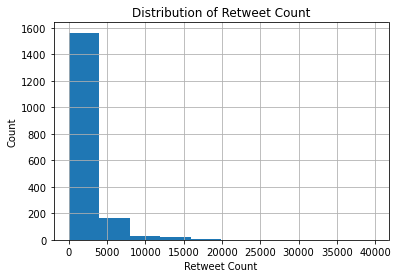

Skewness: 4.91813249361323


In [111]:
plot_hist_skewness(master_df["retweet_count"], "Retweet Count", "Retweet_Hist")

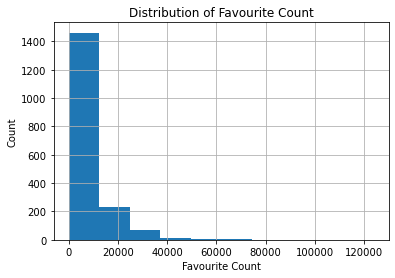

Skewness: 3.7150886260223293


In [112]:
plot_hist_skewness(master_df["favorite_count"], "Favourite Count", "Favourite_Hist")

Both the retweet count and the favourite count each have a strong positive skew, as shown in the histograms and by the skewness values significantly greater than 0.5. As such, we will use the median in any calculations.

We look at the relationship between the retweet count and the favorite count, using a scatter plot, as well as computation of the correlation between the two.

Correlation between Retweet Count and Favourite Count:


retweet_count  favorite_count
retweet_count        1.000000        0.930077
favorite_count       0.930077        1.000000

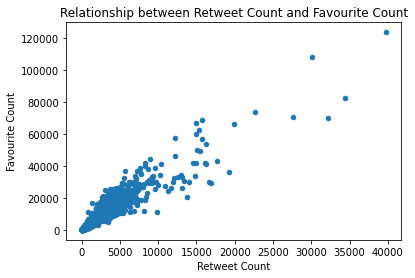

In [113]:
# Scatter plot of retweet count and favourite count
master_df.plot(kind = "scatter", x = "retweet_count", y = "favorite_count");
plt.title("Relationship between Retweet Count and Favourite Count")
plt.ylabel("Favourite Count")
plt.xlabel("Retweet Count")
plt.savefig("Counts_Scatter.png", bbox_inches = "tight")

# Correlation between retweet count and favourite count
print("Correlation between Retweet Count and Favourite Count:")
master_df[["retweet_count", "favorite_count"]].corr()

The scatter plot indicates a linear relationship between the retweet count and the favourite count. Both the plot, and the high value of the correlation, tell us that there is a very strong positive correlation between the two. As such, our preliminary expectation as we go through our research questions is that the patterns of the variations in the relationship between each metric (dog rating, tweet length, image count, dog breed, and dog stage) and retweet count will be similar to those with the favourite count.

For the first 5 questions, we will use only the data for which the value identified in *p1* is a dog breed. Thus, we will now extract a subset of the dataframe for which this condition is true, using a mask on *p1_dog*.

In [114]:
# Subset of data where the prediction of whether the image in a tweet is of a dog is True
true_dogs = master_df[master_df["p1_dog"] == True]
len(true_dogs)

1340

This subset contains 1340 entries. We now address each of our research questions in turn.

#### Research Question 1: Do tweets that give higher dog ratings receive more retweets and favourites than tweets with lower dog ratings? <a id="Question1"></a>

We divide the tweets into two groups, those with lower ratings and those with higher ratings. Low ratings will be those that are less than the median tweet rating, and those with a rating equal to or higher than the median tweet rating will be classified as having high ratings. We will also compute the median retweet count and favourite count for each group.

In [115]:
rating_mask = true_dogs["rating_numerator"] >= true_dogs["rating_numerator"].median()
grouped_by_rating = true_dogs[["retweet_count", "favorite_count"]].groupby(rating_mask).median()
grouped_by_rating.index = ["Lower Ratings", "Higher Ratings"]

We plot a bar chart to visualize the medians for each group.

retweet_count  favorite_count
Lower Ratings             578            1993
Higher Ratings           1797            7145

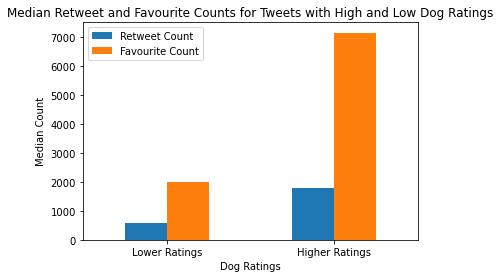

In [116]:
# Plotting bar chart for groups
grouped_by_rating.plot(kind = "bar");
plt.title("Median Retweet and Favourite Counts for Tweets with High and Low Dog Ratings");
plt.legend(["Retweet Count", "Favourite Count"]);
plt.xlabel("Dog Ratings");
plt.ylabel("Median Count");
plt.xticks(rotation = 0);
plt.savefig("Q1_Bar1.png", bbox_inches = "tight")

grouped_by_rating

We see that the values for the higher rating group are much higher than those of the lower rating group, for both the retweets and favourites. We compute the ratio of the medians for the higher rating group to the medians of the lower rating group.

In [117]:
# Ratio between groups
grouped_by_rating / grouped_by_rating.loc["Lower Ratings",]

retweet_count  favorite_count
Lower Ratings        1.000000        1.000000
Higher Ratings       3.108997        3.585048

We find that the median values for the higher rating group are about 3 times those of the lower rating group. This would seem to indicate that higher ratings meaning more retweets and favourites. We look at the correlations between the dog rating given in the tweet and the retweet and favourite counts of the tweet. We will plot correlation heatmaps for all dog ratings, lower dog ratings, and higher dog ratings.

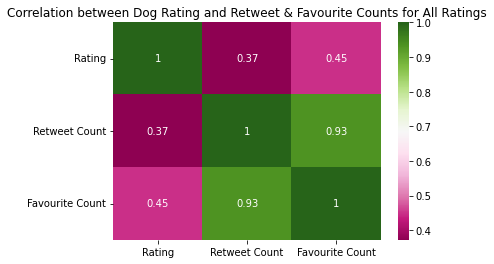

In [118]:
# Correlation heatmap for all ratings
sns.heatmap(true_dogs[["rating_numerator", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
           yticklabels = ["Rating", "Retweet Count", "Favourite Count"], xticklabels = ["Rating", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Dog Rating and Retweet & Favourite Counts for All Ratings");
plt.savefig("Q1_Corr1.png", bbox_inches = "tight")

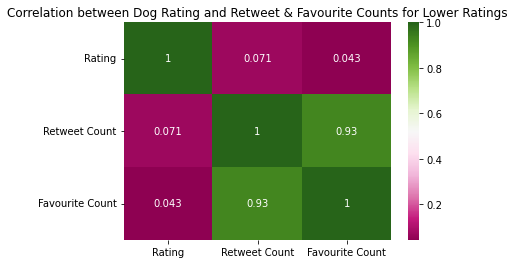

In [119]:
# Correlation heatmap for lower ratings
sns.heatmap(true_dogs[~rating_mask][["rating_numerator", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
           yticklabels = ["Rating", "Retweet Count", "Favourite Count"], xticklabels = ["Rating", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Dog Rating and Retweet & Favourite Counts for Lower Ratings");
plt.savefig("Q1_Corr2.png", bbox_inches = "tight")

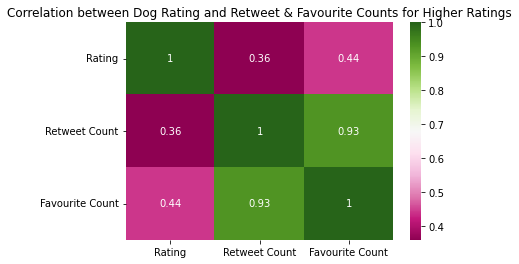

In [120]:
# Correlation heatmap for higher ratings
sns.heatmap(true_dogs[rating_mask][["rating_numerator", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
           yticklabels = ["Rating", "Retweet Count", "Favourite Count"], xticklabels = ["Rating", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Dog Rating and Retweet & Favourite Counts for Higher Ratings");
plt.savefig("Q1_Corr3.png", bbox_inches = "tight")

We find that there is a moderate positive correlation for the higher rating group and for all dog tweets combined, but a correlation of almost 0 for the lower rating group.

We move on to the next research question.

#### Research Question 2: Do longer tweets have higher or lower retweet and favourite counts than shorter tweets? <a id="Question2"></a>

We are going to divide the tweets into two groups, those of shorter length and those that are longer. Tweets shorter than the median tweet length will be classified as short tweets, and tweets as long as or longer than the median tweeet length will be classified as long tweets. We then compute the median retweet count and favourite count for each group.

In [121]:
length_mask = true_dogs["text_length"] >= true_dogs["text_length"].median()
grouped_by_length = true_dogs[["retweet_count", "favorite_count"]].groupby(length_mask).median()
grouped_by_length.index = ["Shorter Tweets", "Longer Tweets"]

We plot a bar chart to visualize the medians for each group.

retweet_count  favorite_count
Shorter Tweets         1026.0          3341.0
Longer Tweets          1224.5          4114.0

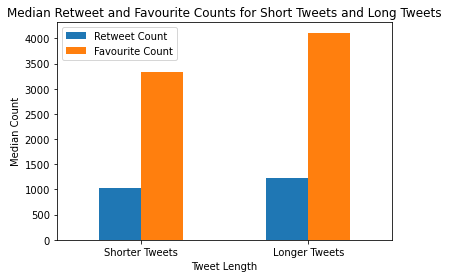

In [122]:
# Plotting bar chart for groups
grouped_by_length.plot(kind = "bar");
plt.title("Median Retweet and Favourite Counts for Short Tweets and Long Tweets");
plt.legend(["Retweet Count", "Favourite Count"]);
plt.xlabel("Tweet Length");
plt.ylabel("Median Count");
plt.xticks(rotation = 0);
plt.savefig("Q2_Bar1.png", bbox_inches = "tight")

grouped_by_length

We find that the values for the longer tweets are higher than those for the shorter tweets. We compute the ratio of the medians for the longer tweet group to the medians of the shorter tweet group.

In [123]:
# Ratio between groups
grouped_by_length / grouped_by_length.loc["Shorter Tweets",]

retweet_count  favorite_count
Shorter Tweets        1.00000        1.000000
Longer Tweets         1.19347        1.231368

We see that the median retweet and favourite counts for longer tweets are 19% and 23% higher than those of the shorter tweets. This would intuitively point to a slight positive correlation between tweet length and retweet and favourite count. We check for this by plotting correlation heatmaps for all dog tweets, as well as correlation heatmaps for the shorter tweet group and the longer tweet group.

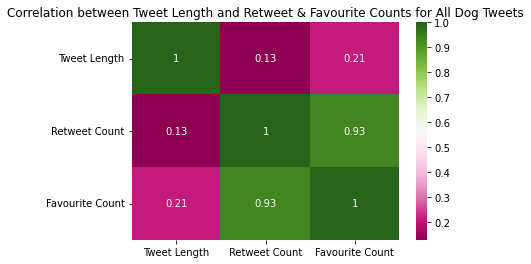

In [124]:
# Correlation heatmap for all dog tweets
sns.heatmap(true_dogs[["text_length", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
           yticklabels = ["Tweet Length", "Retweet Count", "Favourite Count"], xticklabels = ["Tweet Length", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Tweet Length and Retweet & Favourite Counts for All Dog Tweets");
plt.savefig("Q2_Corr1.png", bbox_inches = "tight")

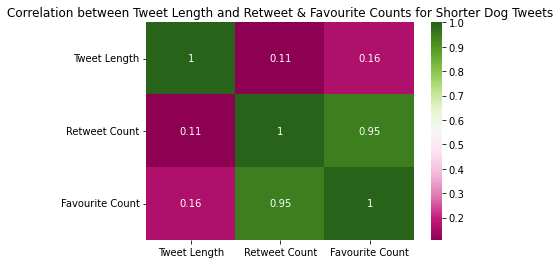

In [125]:
# Correlation heatmap for shorter dog tweets
sns.heatmap(true_dogs[~length_mask][["text_length", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
           yticklabels = ["Tweet Length", "Retweet Count", "Favourite Count"], xticklabels = ["Tweet Length", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Tweet Length and Retweet & Favourite Counts for Shorter Dog Tweets");
plt.savefig("Q2_Corr2.png", bbox_inches = "tight")

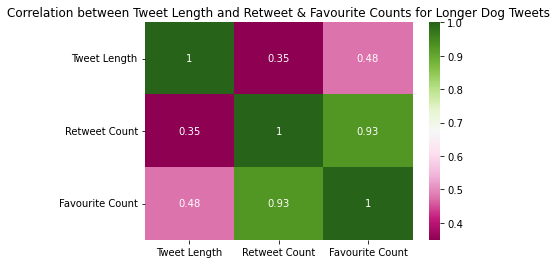

In [126]:
# Correlation heatmap for longer dog tweets
sns.heatmap(true_dogs[length_mask][["text_length", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
           yticklabels = ["Tweet Length", "Retweet Count", "Favourite Count"], xticklabels = ["Tweet Length", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Tweet Length and Retweet & Favourite Counts for Longer Dog Tweets");
plt.savefig("Q2_Corr3.png", bbox_inches = "tight")

We find that there is a weak positive correlation between tweet length and response to the tweet for all dog tweets combined. There is a similar result for the shorter tweet group. The correlation for the longer tweet group is higher than the other two, but is overall a moderate positive correlation. In all cases, the correlation is higher for the favourite counts than for the retweet counts.

We move on to the next research question.

#### Research Question 3: Do tweets with more images have higher or lower retweet and favourite counts than tweets with fewer images? <a id="Question3"></a>

We first look at the counts of tweets for each number of images in a tweet.

In [127]:
true_dogs["total_image_count"].value_counts()

1    960
2    221
4     82
3     77
Name: total_image_count, dtype: int64

We find that the majority of the dog tweets have only 1 image each, and the count decreasees as the number of images increases.

We group the tweets by image count.

In [128]:
grouped_by_image_count = true_dogs.groupby("total_image_count")[["retweet_count", "favorite_count"]]

We compute the median retweet and favourite count for each group, and then plot a bar chart to visualize the medians for each group.

retweet_count  favorite_count
total_image_count                               
1                            870            2852
2                           2046            7658
3                           1797            6157
4                           2466            8690

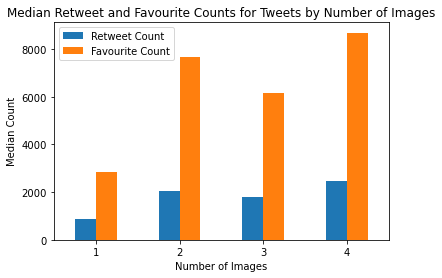

In [129]:
# Plotting bar chart for groups
grouped_by_image_count.median().plot(kind = "bar");
plt.title("Median Retweet and Favourite Counts for Tweets by Number of Images");
plt.legend(["Retweet Count", "Favourite Count"]);
plt.xlabel("Number of Images");
plt.ylabel("Median Count");
plt.xticks(rotation = 0);
plt.savefig("Q3_Bar1.png", bbox_inches = "tight")

grouped_by_image_count.median()

The group with 4 images each shows the highest median retweet count and favourite count, followed by the group with 2 images per tweet, the group with 3 images, and lastly the group with 1 image per tweet. We look at the ratios of the medians of each group to those of the group with 1 image per tweet.

In [130]:
# Ratio between groups
grouped_by_image_count.median() / grouped_by_image_count.median().loc[1,]

retweet_count  favorite_count
total_image_count                               
1                       1.000000        1.000000
2                       2.351724        2.685133
3                       2.065517        2.158836
4                       2.834483        3.046985

We see that the tweets with 4 images have a medians about three times those of the group with 1 tweet. Tweets with 3 images have median counts that are about two times those of the group with 1 image. For the tweets with 2 images, the median retweet count and favourite count are 2.3 and 2.7 times those of the group with 1 tweet per image respectively. In all cases, the ratios are higher for the favourite counts than the retweet counts.

We plot a correlation plot between the image count and the retweet and favourite counts.

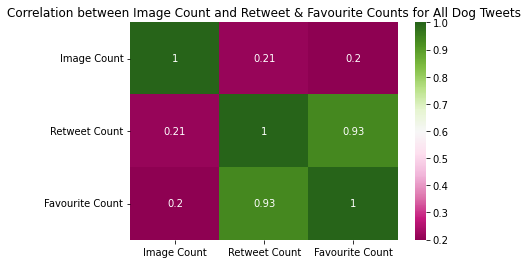

In [131]:
# Correlation heatmap for all image counts
sns.heatmap(true_dogs[["total_image_count", "retweet_count", "favorite_count"]].corr(), annot = True, cmap = "PiYG",
            yticklabels = ["Image Count", "Retweet Count", "Favourite Count"], xticklabels = ["Image Count", "Retweet Count", "Favourite Count"]);
plt.title("Correlation between Image Count and Retweet & Favourite Counts for All Dog Tweets");
plt.savefig("Q3_Corr1.png", bbox_inches = "tight")

We see that there is a weak positive correlation between image count and retweet and favourite count. The value of the correlation is almost equal for the retweets and favourites.

We move on to the next research question.

#### Research Question 4: Do tweets with certain dog breeds have higher or lower retweet and favourite counts than other breeds? <a id="Question4"></a>

We first find the total number of breeds that are in our dataframe.

In [132]:
true_dogs["p1"].nunique()

110

There are 110 dog breeds. This is a large enough number that for this question we will work with the retweet counts and favourite counts separately, for ease of plotting and comprehensibility of our plots.

We start with retweet counts. We will group the tweets by dog breed identified in the tweet, and compute the median retweet count per breed. We will then sort the values in decsending order and use a bar chart to visualize the median retweet count for each dog breed.

In [133]:
retweeted_breeds = true_dogs.groupby("p1")["retweet_count"].median().sort_values(ascending = False)

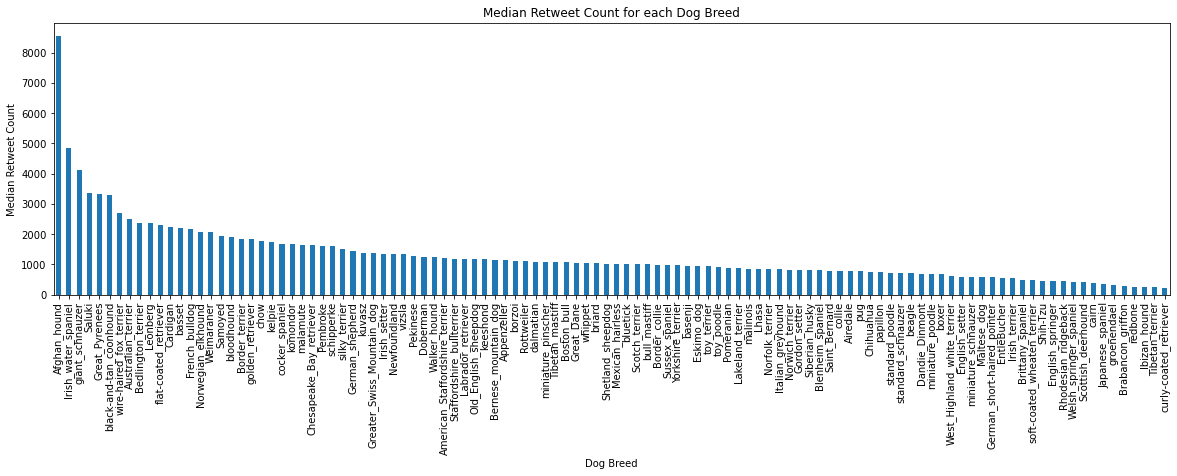

In [134]:
# Plotting bar chart for groups
retweeted_breeds.plot(kind = "bar", figsize = (20, 5));
plt.ylabel("Median Retweet Count");
plt.xlabel("Dog Breed");
plt.title("Median Retweet Count for each Dog Breed");
plt.savefig("Q4_Bar1.png", bbox_inches = "tight")

The 5 most retweeted breeds and 5 least retweeted dog breeds are as below.

In [135]:
print("Five most retweeted breeds:")
display(retweeted_breeds.head())
print("\n\nFive least retweeted breeds:")
display(retweeted_breeds.tail())

Five most retweeted breeds:


p1
Afghan_hound           8563.0
Irish_water_spaniel    4845.0
giant_schnauzer        4108.5
Saluki                 3362.5
Great_Pyrenees         3327.5
Name: retweet_count, dtype: float64



Five least retweeted breeds:


p1
Brabancon_griffon         267.0
redbone                   241.0
Ibizan_hound              240.0
Tibetan_terrier           235.0
curly-coated_retriever    221.0
Name: retweet_count, dtype: float64

We look at the median number of retweets for all dog breeds.

In [136]:
true_dogs["retweet_count"].median()

1111.0

The median counts of the most retweeted breeds are approximately 3 to 8 times the median retweet count for all breeds combined. The median counts of the least retweeted breeds range from 20% to 25% of the median for all breeds.

We now turn to favourite counts. We will group the tweets by dog breed identified in the tweet, and compute the median favourite count per breed. We will then sort the values in decsending order and use a bar chart to visualize the median favourite count for each dog breed.

In [137]:
favourited_breeds = true_dogs.groupby("p1")["favorite_count"].median().sort_values(ascending = False)

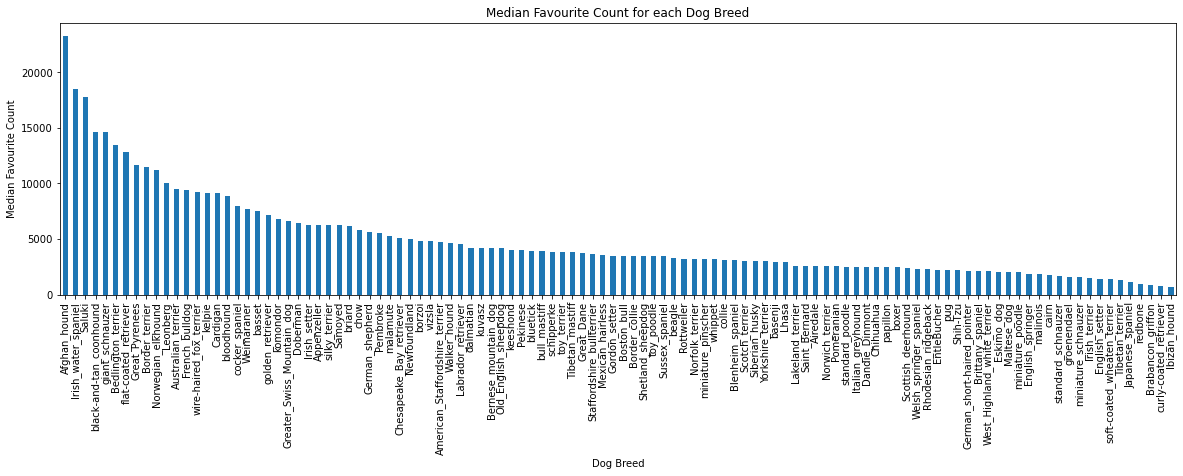

In [138]:
# Plotting bar chart for groups
favourited_breeds.plot(kind = "bar", figsize = (20, 5));
plt.ylabel("Median Favourite Count");
plt.xlabel("Dog Breed");
plt.title("Median Favourite Count for each Dog Breed");
plt.savefig("Q4_Bar2.png", bbox_inches = "tight")

The 5 most favourited breeds and 5 least favourited dog breeds are as below.

In [139]:
print("Five most favourited breeds:")
display(favourited_breeds.head())
print("\n\nFive least favourited breeds:")
display(favourited_breeds.tail())

Five most favourited breeds:


p1
Afghan_hound               23283.0
Irish_water_spaniel        18451.0
Saluki                     17787.5
black-and-tan_coonhound    14621.0
giant_schnauzer            14607.5
Name: favorite_count, dtype: float64



Five least favourited breeds:


p1
Japanese_spaniel          1111.0
redbone                    966.0
Brabancon_griffon          896.0
curly-coated_retriever     812.5
Ibizan_hound               662.0
Name: favorite_count, dtype: float64

We look at the median number of favourites for all dog breeds.

In [140]:
true_dogs["favorite_count"].median()

3623.0

The median counts of the most favourited breeds range from 4 to 6.5 times the median favourite count for all breeds combined. The median counts of the least favourited breeds range from 18% to 30% of the median for all breeds

We find that four of the most favourited breeds are also four of the most retweeted breeds. Similarly, four of the least favourited breeds are four of the least retweeted breeds. We look at the 5 breeds that appear most in our dataframe.

In [141]:
breed_count = true_dogs["p1"].value_counts()

In [142]:
breed_count.head()

golden_retriever      128
Pembroke               83
Labrador_retriever     79
Chihuahua              72
pug                    51
Name: p1, dtype: int64

There are 128 tweets in the dataframe for which the breed is identified as Golden Retriever, the highest count in the dataframe. We will use this for comparison purposes.

For our 8 breeds that have the highest and lowest favourite and retweet counts, we find the number of times each breed appears in the dataframe.

In [143]:
# We create a list of breeds using list comprehensions, which are populated with a breed only when the
# breed appears in the top 5 for both retweet and favourite counts, or in the bottom 5 for both counts.
extreme_breeds = [x for x in retweeted_breeds.head().index if x in favourited_breeds.head().index] + \
[x for x in retweeted_breeds.tail().index if x in favourited_breeds.tail().index]

We use the list of most and least retweeted and favourited breeds to retrieve the counts for each of the 8 breeds.

In [144]:
breed_count[extreme_breeds]

Afghan_hound              1
Irish_water_spaniel       3
giant_schnauzer           2
Saluki                    4
Brabancon_griffon         2
redbone                   5
Ibizan_hound              3
curly-coated_retriever    2
Name: p1, dtype: int64

We find that the breeds that have favourite and retweet counts at either extreme also have only a few entries each in the dataframe, 5 at most. This indicates that breeds that appear least in the dataframe have the most extreme median retweet and favourite values.

For the breeds that appear most in our dataframe, we look at the retweet and favourite counts for each breed.

In [145]:
retweeted_breeds[breed_count.head().index]

golden_retriever      1843.5
Pembroke              1621.0
Labrador_retriever    1179.0
Chihuahua              736.5
pug                    775.0
Name: retweet_count, dtype: float64

In [146]:
favourited_breeds[breed_count.head().index]

golden_retriever      7137.0
Pembroke              5497.0
Labrador_retriever    4585.0
Chihuahua             2485.5
pug                   2190.0
Name: favorite_count, dtype: float64

We revisit the descriptive statistics for the favourite and retweet counts.

In [147]:
true_dogs[["retweet_count", "favorite_count"]].describe()

retweet_count  favorite_count
count    1340.000000     1340.000000
mean     2054.123134     7667.475373
std      2964.633883    10303.176056
min        11.000000       66.000000
25%       501.750000     1794.000000
50%      1111.000000     3623.000000
75%      2536.750000     9783.500000
max     39755.000000   123686.000000

We find that, for the breeds that appear most in the dataframe, the median retweet and favourite counts fall between the first and third quartiles of the retweet and favourite counts for all dogs. This indicates that the medians for the breeds that appear most often in the data are closer to the overall median than the breeds that appear least often.

We move on to the next research question.

#### Research Question 5: Do tweets with certain dog stages have higher or lower retweet and favourite counts than other dog stages? <a id="Question5"></a>

We first look at the counts for each dog stage in the dataframe.

In [148]:
true_dogs["dog_stage"].value_counts()

None             1142
pupper            127
doggo              41
puppo              17
doggo,pupper        6
floofer             5
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Some of the entries have overlap, where two dog stages are mentioned in the same tweet. Rather than using the `groupby()` function on the *dog_stage* column, which will assign each entry to one group and one group only, we will assign groups manually. For each group, we will check whether a tweet mentions the dog stage in quesion, and if it does, it is assigned to the group, regardless of how many other dog stages are mentioned in the tweet. We then compute the median for each group.

In [149]:
# Assigning all tweets that mention doggo
doggo_tweets = true_dogs[true_dogs["dog_stage"].str.contains("doggo")]
doggo_tweets_median = doggo_tweets[["retweet_count", "favorite_count"]].median()

# Assigning all tweets that mention floofer
floofer_tweets = true_dogs[true_dogs["dog_stage"].str.contains("floofer")]
floofer_tweets_median = floofer_tweets[["retweet_count", "favorite_count"]].median()

# Assigning all tweets that mention pupper
pupper_tweets = true_dogs[true_dogs["dog_stage"].str.contains("pupper")]
pupper_tweets_median = pupper_tweets[["retweet_count", "favorite_count"]].median()

# Assigning all tweets that mention puppo
puppo_tweets = true_dogs[true_dogs["dog_stage"].str.contains("puppo")]
puppo_tweets_median = puppo_tweets[["retweet_count", "favorite_count"]].median()

# Assigning all tweets that do not mention any dog stage
no_stage_tweets = true_dogs[true_dogs["dog_stage"].str.contains("None")]
no_stage_tweets_median = no_stage_tweets[["retweet_count", "favorite_count"]].median()

We combine the Pandas series holding the medians for each group into a single dataframe.

In [150]:
# Concatenating groups into one dataframe
dog_stage_groups = pd.concat([doggo_tweets_median, floofer_tweets_median, pupper_tweets_median,
                              puppo_tweets_median, no_stage_tweets_median], axis = 1).transpose()
dog_stage_groups.index = ["Doggo", "Floofer", "Pupper", "Puppo", "No Stage"]

We plot a bar chart to visualize the medians for each group.

retweet_count  favorite_count
Doggo            2054.0          9033.0
Floofer          2705.0          9993.5
Pupper            931.0          2831.0
Puppo            2512.0         13805.0
No Stage         1078.5          3524.5

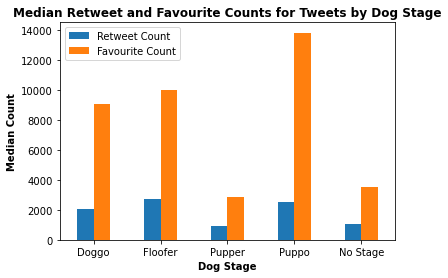

In [151]:
# Plotting bar chart for groups
dog_stage_groups.plot(kind = "bar");
plt.title("Median Retweet and Favourite Counts for Tweets by Dog Stage", weight = "bold");
plt.legend(["Retweet Count", "Favourite Count"]);
plt.xlabel("Dog Stage", weight = "bold");
plt.ylabel("Median Count", weight = "bold");
plt.xticks(rotation = 0);
plt.savefig("Q5_Bar1.png", bbox_inches = "tight")

dog_stage_groups

We see that the median retweet count is highest for the floofer dog stage, followed by the puppo, doggo, no stage and pupper groups. For favourite counts, the median count is highest for the puppo stage, followed by floofer, doggo, no stage and pupper groups in order.

We look at the ratios of the medians of each group to those of the group without any dog stages.

In [152]:
# Ratio between groups
dog_stage_groups / dog_stage_groups.loc["No Stage"]

retweet_count  favorite_count
Doggo          1.904497        2.562917
Floofer        2.508113        2.835438
Pupper         0.863236        0.803235
Puppo          2.329161        3.916868
No Stage       1.000000        1.000000

The pupper stage is the only stage that has a lower median count for both retweets and favourites than the tweets with no stages. The rest of the stages range from being 2 to 4 times the median count of the no stage group.

We move on to the final research question.

#### Research Question 6: Do tweets that contain dogs garner more popularity, in terms of retweet and favourite count, than those that do not contain dogs? <a id="Question6"></a>

We now use the full dataframe, which includes the tweets for which the item identified in the tweet image is not a dog breed. In addition to giving ratings for dogs, the WeRateDogs Twitter account gives humorous, tongue-in-cheek ratings to non-dog animals as if they were dogs. The ratings in these tweets are usually less than 10. Examples of such tweets are displayed below, showing the text of the tweet and the actual object in the image.

In [153]:
# Tweet IDs obtained from visual inspection
master_df[master_df["tweet_id"].isin(["672256522047614977", "666362758909284353", "668297328638447616"])][["text", "p1"]].values

array([['Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd',
        'ostrich'],
       ['2 rare dogs. They waddle (v inefficient). Sometimes slide on bellies. Right one wants to be aircraft Marshall. 9/10s https://t.co/P8bivfp5sU',
        'king_penguin'],
       ['Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM',
        'guinea_pig']], dtype=object)

We would like to compare the response to tweets with such ratings, to tweets with the ratings of actual dogs.

We first group the data by whether or not the tweet was recognised as containing a dog breed, and compute the median rating for each group.

In [154]:
master_df.groupby("p1_dog")["rating_numerator"].median()

p1_dog
False    10
True     11
Name: rating_numerator, dtype: int64

We see that the median rating for tweets that are not about dogs is slightly lower than the median rating for tweets that are about dogs.

We once again group the tweets by whether or not they are about dogs.

In [155]:
grouped_by_content = master_df.groupby("p1_dog")[["retweet_count", "favorite_count"]]

We compute the median retweet and favourite count for each group,  and plot a bar chart to visualize the medians for each group.

retweet_count  favorite_count
p1_dog                               
False           888.5          2598.5
True           1111.0          3623.0

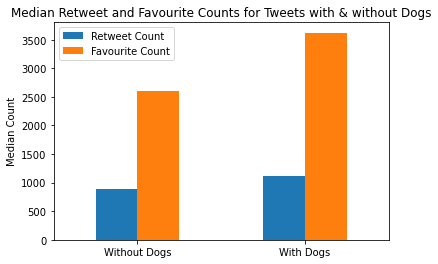

In [156]:
# Plotting bar chart for groups
grouped_by_content.median().plot(kind = "bar");
plt.title("Median Retweet and Favourite Counts for Tweets with & without Dogs");
plt.legend(["Retweet Count", "Favourite Count"]);
plt.xlabel(None);
plt.ylabel("Median Count");
plt.xticks(grouped_by_content.median().index, labels = ["Without Dogs", "With Dogs"], rotation = 0);
plt.savefig("Q6_Bar1.png", bbox_inches = "tight")

grouped_by_content.median()

We find that tweets that rate actual dogs have higher median retweet and favourite counts than those not rating dogs.

We calculate the ratio of the median of the tweets about dogs to that of tweets that are not about dogs.

In [157]:
# Ratio between groups
grouped_by_content.median() / grouped_by_content.median().loc[False,]

retweet_count  favorite_count
p1_dog                               
False        1.000000        1.000000
True         1.250422        1.394266

Tweets that are about dogs have a median retweet count that is 25% more and a favourite count 39% more than tweets not about dogs.

### Insights <a id="Insights"></a>
In this section, we highlight the insights from from our analysis for each of our research questions in turn.

**1. Do tweets that give higher dog ratings receive more retweets and favourites than tweets with lower dog ratings?**  
We found that the tweets giving higher dog ratings got more retweets and favourites than tweets giving lower dog ratings. On average, tweets with higher ratings got 3.1 times the retweets and 3.6 times the favourites that tweets with lower ratings got. We also found an overall moderate positive correlation between dog ratings and the counts, with the correlation slightly higher for the favourite count. When grouped by rating, tweets with higher ratings had a moderate positive correlation with the counts, and tweets with lower ratings had a very very weak positive correlation with the counts. These findings seem to indicate that tweets with higher ratings consistently get more response than tweets that give lower ratings. We, however, cannot conclude based on this alone that this relationship is causal.

**2. Do longer tweets receive higher or lower retweet and favourite counts than shorter tweets?**  
Our findings showed that longer tweets got more retweets and favourites than shorter tweets. Longer tweets got 19% more retweets and 23% more favourites on average. We also found a weak positive correlation between the number of characters in a tweet and the number of retweets and favourites the tweet received, for tweets of all lengths combined. When grouped by tweet length, longer tweets had a moderate positive correlation to the retweet and favourite counts, whilst shorter tweets showed a weak positive correlation to the same. Thus there is indication that longer tweets receive more response, but we cannot definitely say it is because of the length of the tweets.

**3. Do tweets with more images receive higher or lower retweet and favourite counts than tweets with fewer images?**  
We found that tweets with only 1 image had the lowest retweet and favourite counts on average. For retweets, tweets with 2 images had more retweets by a factor of 2.35, tweets with 3 images by a factor of 2.07, and tweets with 4 images by a factor of 2.83. When it comes to favourite counts, tweets with 2 images had 2.69 times the favourites of tweets with 1 image, tweets with 3 images got 2.16 times, and tweets with 4 images have 3 times the favourites of the tweets with only 1 image. There is a weak positive correlation between the number of images in a tweet and the retweet and favourite counts.

**4. Do tweets with certain dog breeds receive higher or lower retweet and favourite counts than others?**  
We found that 4 dog breeds appeared in the top 5 for both most retweeted and most favourited breeds. These were the Afghan Hound, Irish Water Spaniel, Saluki, and Giant Schnauzer. We also found that 4 dog breeds appeared in the 5 least retweeted and 5 least favourited breeds. These were Brabancon Griffon, Redbone, Ibizan Hound, and Curly-coated Retriever. We also found that these breeds that had very high or very low counts also appeared the fewest times in the dataset. The 5 breeds that appeared most often, Golden Retriever, Pembroke, Labrador Retriever, Chihuahua, and Pug, all had retweet and favourite counts that were much less extreme, and that fell between the 25th and 75th percentiles of counts for all breeds overall.

**5. Do tweets with certain dog stages have higher or lower retweet and favourite counts than other dog stages?**  
Tweets that mentioned “puppo” received the highest favourite counts, followed by those that mentioned, in descending order, “floofer”, “doggo”, those that didn’t mention a dog stage, and “pupper”. On average, tweets that mentioned “floofer” got the most retweets, followed by “puppo”, “doggo”, not mentioning a dog stage, and “pupper”. The tweets mentioning “pupper” were the only ones that got lower favourite and retweet counts than those that didn’t mention a dog stage at all.

**6. Do tweets that contain dogs garner more popularity, in terms of retweet and favourite count, than those that do not contain dogs?**  
Tweets that were ratings of dogs received higher retweet counts and favourite counts, on average, than those that were ratings of non-dog animals. Tweets about dogs received 25% more retweets and 39% more favourites.

Additional details and final conclusions are provided in the `act_report.html` file.